In [ ]:
import random
from collections import Counter
import itertools
import matplotlib.pyplot as plt

In [ ]:
ranks = ['2','A','K','Q','J','10','9','8','7','6','5','4','3']
suits = ['♠', '♥', '♦', '♣']

# Create the standard 52-card deck
deck = [rank + suit for rank in ranks for suit in suits]

# Shuffle the deck randomly
random.shuffle(deck)

# Number of players in the game
num_players = 4

# Deal the cards to each player
hands = [deck[i::num_players] for i in range(num_players)]

# Sort the cards by rank and suit
def sort_by_rank_and_suit(card):
  return (ranks.index(card[:-1]), suits.index(card[-1]))

# Sort each player's hand
sorted_hands = [sorted(hand, key=sort_by_rank_and_suit) for hand in hands]

# Print each player's hand
for i, hand in enumerate(sorted_hands):
  print(f"Player {i+1}'s hand: {', '.join(hand)}")

Player 1's hand: A♥, A♦, K♦, Q♦, J♠, 10♥, 9♠, 8♠, 6♠, 6♦, 5♠, 5♣, 4♦
Player 2's hand: 2♥, A♣, K♥, Q♠, Q♥, J♣, 10♦, 10♣, 9♦, 8♣, 7♥, 3♦, 3♣
Player 3's hand: 2♦, A♠, Q♣, J♦, 9♥, 9♣, 7♦, 7♣, 6♥, 5♥, 4♥, 3♠, 3♥
Player 4's hand: 2♠, 2♣, K♠, K♣, J♥, 10♠, 8♥, 8♦, 7♠, 6♣, 5♦, 4♠, 4♣


In [ ]:
# Function to check if a move is valid
def is_valid_move(played_cards, hand):
    if not hand:
        return False  # First move is always valid

    last_rank_index = ranks.index(played_cards[-1][:-1])

    # Check for bombs (beating presently-winning 2s)
    if played_cards[-1] == '3♠':
        if len(hand) == 4 and all(card[:-1] == hand[0][:-1] for card in hand):
            return True
        elif len(hand) >= 6 and all(hand[i][:-1] == hand[i+1][:-1] for i in range(0, len(hand), 2)):
            return True

    # Check if the played_cards beat the last played cards in rank
    if len(hand) == 1:
        return ranks.index(hand[0][:-1]) > last_rank_index
    elif len(hand) == 2:
        return hand[0][:-1] == hand[1][:-1] and ranks.index(hand[0][:-1]) > last_rank_index
    elif len(hand) == 3:
        return hand[0][:-1] == hand[1][:-1] == hand[2][:-1] and ranks.index(hand[0][:-1]) > last_rank_index
    elif len(hand) == 4:
        return hand[0][:-1] == hand[1][:-1] == hand[2][:-1] == hand[3][:-1] and ranks.index(hand[0][:-1]) > last_rank_index
    else:
        # Check for valid sequences
        hand_ranks = [ranks.index(card[:-1]) for card in hand]
        if len(set(hand_ranks)) == len(hand) and hand_ranks and sorted(hand_ranks) == list(range(hand_ranks[0], hand_ranks[-1] + 1)):
          return hand_ranks[0] > last_rank_index
        else:
          return False

In [ ]:
# Function to play a move
def play_move(played_cards, hand):
    if not played_cards:
        if not hand:
            return False  # First player cannot pass, must play a valid card
        played_cards.extend(hand)
        return True

    if not hand:  # Player passes their turn
        return False

    if is_valid_move(played_cards, hand):
        played_cards.extend(hand)
        return True

    return False

# Function to simulate the game
def play_game():
    # Initialize current_player to 0 since the first player starts the game
    current_player = 0

    # Create the standard 52-card deck
    deck = [rank + suit for rank in ranks for suit in suits]

    # Shuffle the deck randomly
    random.shuffle(deck)

    # Deal the cards to each player
    hands = [deck[i::num_players] for i in range(num_players)]

    # Sort each player's hand by rank and suit
    sorted_hands = [sorted(hand, key=sort_by_rank_and_suit) for hand in hands]

    # Find the first player (player with 3♠)
    current_player = None
    played_cards = []
    for i, hand in enumerate(sorted_hands):
        if '3♠' in hand:
            current_player = i
            played_cards = ['3♠']
            break

    # Randomly choose the starting player if no player has 3♠
    if current_player is None:
        current_player = random.randint(0, num_players - 1)
        played_cards = []

    # Main game loop
    active_players = set(range(num_players))
    while len(active_players) > 1:
        # Get the player's current hand
        current_hand = sorted_hands[current_player]

        # Player's move
        valid_moves = [card for card in current_hand if is_valid_move(played_cards, [card])]
        move = None  # Initialize move outside the loop
        if not valid_moves:  # Player passes their turn
            active_players.remove(current_player)
        else:
            move = random.choice(valid_moves)
            # Player attempts to play a move
            valid_moves = [card for card in current_hand if is_valid_move(played_cards, [card])]
            if not valid_moves:  # Player passes their turn
                active_players.remove(current_player)
            else:
                move = random.choice(valid_moves)

        if move is not None:  # Play the move
            play_move(played_cards, [move])
            sorted_hands[current_player] = [card for card in current_hand if card != move]

        # Move to the next player
        current_player = (current_player + 1) % num_players

    # Game over, return the winner
    winner = active_players.pop() + 1
    return winner

In [ ]:
# Run the simulation
num_simulations = 40 # Change this to the desired number of simulations
results = [play_game() for _ in range(num_simulations)]

# Calculate the winner statistics
winner_stats = {i+1: results.count(i+1) for i in range(num_players)}
total_games = len(results)
win_rates = {player: (wins / total_games) * 100 for player, wins in winner_stats.items()}

# Print the winner statistics
print("Winner statistics:")
for player, count in winner_stats.items():
    print(f"Player {player}: {count} wins ({count / num_simulations * 100:.2f}% win rate)")

Winner statistics:
Player 1: 8 wins (20.00% win rate)
Player 2: 10 wins (25.00% win rate)
Player 3: 12 wins (30.00% win rate)
Player 4: 10 wins (25.00% win rate)


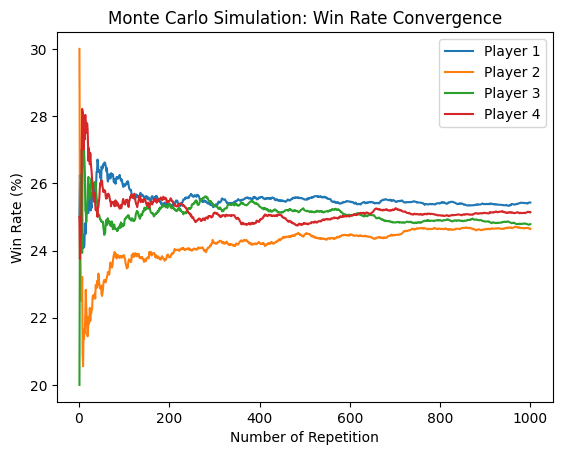

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_simulations = 40
num_repetitions = 1000
total_results = []

win_rates_history = []

for _ in range(num_repetitions):
    results = [play_game() for _ in range(num_simulations)]
    total_results.extend(results)

    # Calculate the winner statistics
    num_players = max(total_results)
    winner_stats = {i + 1: total_results.count(i + 1) for i in range(num_players)}
    total_games = len(total_results)
    win_rates = {player: (wins / total_games) * 100 for player, wins in winner_stats.items()}

    win_rates_history.append(win_rates)

# Plot the win rate convergence using Monte Carlo simulation
players = list(range(1, num_players + 1))
for player in players:
    player_win_rates = [history[player] for history in win_rates_history]
    plt.plot(np.arange(1, num_repetitions + 1), player_win_rates, label=f'Player {player}')

plt.xlabel('Number of Repetition')
plt.ylabel('Win Rate (%)')
plt.title('Monte Carlo Simulation: Win Rate Convergence')
plt.legend()
plt.show()
